In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker as tick
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
%matplotlib inline

# INWARD REMITTANCES (receiving, incoming)

In [13]:
inrem = pd.read_excel('inward_remit.xlsx')

In [14]:
inrem = inrem[:216]
inrem = inrem[:216]
inrem = inrem.dropna(how='all')
inrem0 = inrem.replace(np.nan, 0)
inrem0 = inrem0.rename(columns={"Migrant remittance inflows (US$ million)": "Inflow Country", "Remittances as a share of GDP in 2021e (%)": "remit_gdp"}).set_index('Inflow Country').replace(' ', np.nan)
# rename country column, rename %GDP column, set country column as index, replace empty value with Nan
inrem0['total_rem'] = inrem0.sum(axis=1)
# add column for aggregate remittances
inrem0.insert(42, 'pct_gdp', value=((1*inrem0['remit_gdp']).astype(str) + "%"))
# add column for percent gdp, converted to percent
colors=['salmon','blue','yellow','magenta','mediumspringgreen','powderblue','blueviolet','goldenrod','crimson','g']

In [4]:
import datapackage
data_url = 'https://datahub.io/core/cpi-us/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

            Date    Index  Inflation
0     1913-01-01    9.800        NaN
1     1913-02-01    9.800       0.00
2     1913-03-01    9.800       0.00
3     1913-04-01    9.800       0.00
4     1913-05-01    9.700      -1.02
...          ...      ...        ...
1208  2013-09-01  234.149       0.12
1209  2013-10-01  233.546      -0.26
1210  2013-11-01  233.069      -0.20
1211  2013-12-01  233.049      -0.01
1212  2014-01-01  233.916       0.37

[1213 rows x 3 columns]
            Date    Index  Inflation
0     1913-01-01    9.800        NaN
1     1913-02-01    9.800       0.00
2     1913-03-01    9.800       0.00
3     1913-04-01    9.800       0.00
4     1913-05-01    9.700      -1.02
...          ...      ...        ...
1208  2013-09-01  234.149       0.12
1209  2013-10-01  233.546      -0.26
1210  2013-11-01  233.069      -0.20
1211  2013-12-01  233.049      -0.01
1212  2014-01-01  233.916       0.37

[1213 rows x 3 columns]


In [15]:
import cpi

In [16]:
adj = pd.read_excel('data/inward_remit.xlsx')
adj = adj.set_index('Migrant remittance inflows (US$ million)')[:214]
adj = adj.rename(columns={'index':'year','2021e':2021, 'Migrant remittance inflows (US$ million)':'inflow_country'}).drop('Remittances as a share of GDP in 2021e (%)',axis=1)
adj.index.rename('index', inplace=True)
adj = adj.T

In [17]:
adj

index,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,"Yemen, Rep.",Zambia,Zimbabwe
1980,NaN,NaN,406.0,NaN,NaN,NaN,NaN,56.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.891617
1981,NaN,NaN,447.0,NaN,NaN,NaN,NaN,42.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.294628
1982,NaN,NaN,507.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,NaN,NaN,9.35478,NaN,NaN,NaN,NaN,NaN,NaN,32.895335
1983,NaN,NaN,392.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,NaN,NaN,7.145182,NaN,NaN,NaN,NaN,NaN,NaN,19.556181
1984,NaN,NaN,329.0,NaN,NaN,NaN,NaN,32.0,NaN,NaN,...,NaN,NaN,8.468008,NaN,NaN,NaN,NaN,NaN,NaN,3.806287
1985,NaN,NaN,313.0,NaN,NaN,NaN,NaN,27.0,NaN,NaN,...,NaN,NaN,8.735109,1.0,NaN,NaN,NaN,NaN,NaN,0.619641
1986,NaN,NaN,358.0,NaN,NaN,NaN,11.185185,32.0,NaN,NaN,...,NaN,NaN,8.022562,NaN,NaN,NaN,NaN,NaN,NaN,0.785055
1987,NaN,NaN,487.0,NaN,NaN,NaN,11.744444,34.0,NaN,NaN,...,NaN,NaN,8.4628,NaN,NaN,NaN,NaN,NaN,NaN,1.143026
1988,NaN,NaN,379.0,NaN,NaN,NaN,12.337037,NaN,NaN,NaN,...,NaN,NaN,8.009554,NaN,NaN,NaN,NaN,NaN,NaN,1.382946
1989,NaN,NaN,345.0,NaN,NaN,NaN,13.196296,NaN,NaN,NaN,...,NaN,NaN,7.319443,NaN,NaN,NaN,NaN,NaN,NaN,0.712249


In [8]:

# adj['adjusted'] = adj.apply(lambda x: cpi.inflate(x.MEDIAN_HOUSEHOLD_INCOME, x.YEAR), axis=1) for i in adj.iloc[i]


In [18]:
adj.iloc[4]

index
Afghanistan                   NaN
Albania                       NaN
Algeria                     329.0
American Samoa                NaN
Andorra                       NaN
                           ...   
Virgin Islands (U.S.)         NaN
West Bank and Gaza            NaN
Yemen, Rep.                   NaN
Zambia                        NaN
Zimbabwe                 3.806287
Name: 1984, Length: 214, dtype: object

# (GLOBAL) Countries RECEIVING the most remittances

### Top 10 Remittance Receiving Countries: 
### India, China, Mexico, Philippines, France, Egypt, Nigeria, Germany, Pakistan, Bangladesh

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_35236/3358225703.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



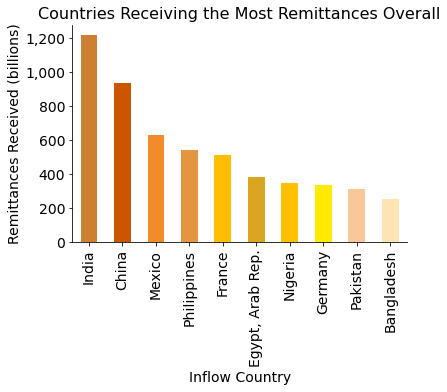

In [22]:
plt.axes(xlabel='Country', ylabel='Remittances Received (billions)')
plt.rc('font', size=14)
col = ['#CD7F32','#CC5500','#F28C28','#E3963E','#FFBF00','#DAA520','#FFC000','#FFEA00','#FAC898','#FFE5B4']
plt.title('Countries Receiving the Most Remittances Overall', fontsize=16)
inrem0.sort_values('total_rem', ascending=False).total_rem[2:12].plot(kind='bar', color=col, fontsize=14)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
fig = plt.show()


In [23]:
import plotly

In [24]:
print(plotly.offline.plot(fig, include_plotlyjs=False, output_type='div'))

PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure

### Top RECEIVERS (1-5, 6-10, 11-15)

In [11]:
inrem_countries = inrem0.sort_values('total_rem', ascending=False)[2:]
inrem_countries = inrem_countries.drop('remit_gdp', axis=1).drop('total_rem', axis=1).drop('pct_gdp', axis=1)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2684825556.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


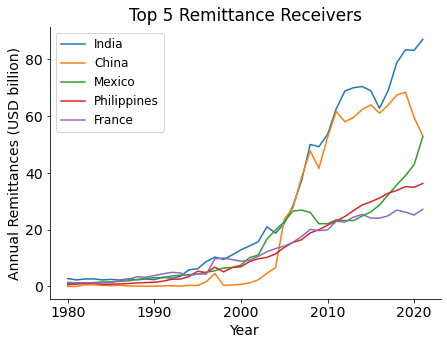

In [12]:
# Formatting
plt.figure(figsize=(7,5))
plt.axes(title='Top 5 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD billion)')
plt.rc('font', size=14)    # overall font
plt.gca().spines[['top', 'right']].set_visible(False)    # remove top and right figure bounds (aesthetic)
plt.ticklabel_format(style='plain', axis='y')    # remove '1e6' (million) multiplier from y-axis

for i in range(5):
    inrem_countries.iloc[i].plot()
    
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)
plt.show()

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/558974298.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions


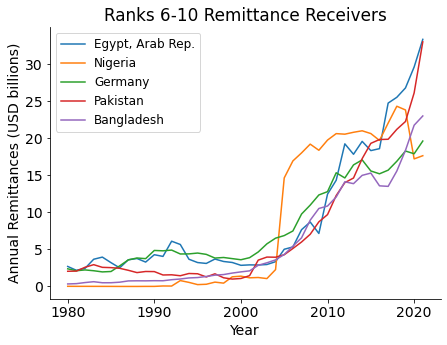

In [13]:
# Top Receivers (#6-10)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 6-10 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD billions)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)

plt.ticklabel_format(style='plain', axis='y')
for i in range(5,10):
    inrem_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])    # change y-labels to billions
plt.legend(loc='best', fontsize=12)

In [14]:
# Top Senders (#11-15)
plt.figure(figsize=(7,5))
plt.axes(title='Ranks 11-15 Remittance Receivers', xlabel='Year', ylabel='Annual Remittances (USD billions)')
plt.rc('font', size=14)   
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ticklabel_format(style='plain', axis='y')

for i in range(10, 15):
    inrem_countries.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=12)
plt.close()

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1936985037.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


# Percent of GDP from Remittances (top 10)

In [15]:
top_gdp = inrem0.sort_values('remit_gdp', ascending=False)
top_gdp = pd.DataFrame(top_gdp['remit_gdp'])

<Figure size 504x360 with 0 Axes>

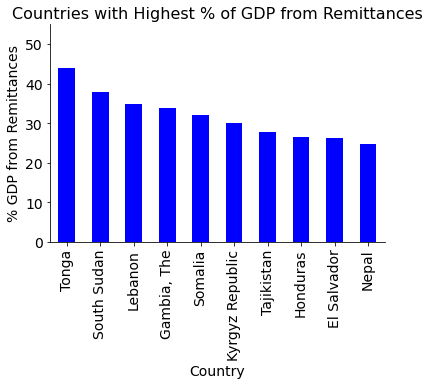

In [16]:
plt.figure(figsize=(7,5))
top_gdp[:10].plot(kind='bar', fontsize=14, ylim=(0,55), color=['b','b','k','m'], xlabel='Country', ylabel='% GDP from Remittances', legend=False)

plt.title('Countries with Highest % of GDP from Remittances', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.rc('font', size=14)  

plt.show()

# Regional Remittance INFLOWS Analysis

In [17]:
import geonamescache
import ast
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T

In [18]:
continents = continents.rename(columns={'continentCode': 'continentcode'})
# cleaning up imported column to merge on so it matches
mapp = pd.merge(countries, continents, on='continentcode', how='left')
# mapping countries onto continents dictionary
mapp = mapp.rename(columns={'name_x': 'Inflow Country'})
# renaming to match col in next merge
mapp2 = mapp[['Inflow Country', 'continentcode', 'capital', 'population_x', 'currencycode', 'languages', 'geonameid']]
# selecting data columns from mapp I want in order to map continent codes (& other data) onto WB dataset
in_global = inrem0.merge(mapp2, on='Inflow Country', how='left')

#### Isolating countries with null continent codes to match them

In [19]:
null_cont = in_global[['Inflow Country', 'continentcode']]
null_cont.continentcode.isna().describe()
# 35 uncategorized countries
null_cont['null'] = null_cont['continentcode'].isna()
null_cont = null_cont.sort_values('null', ascending=False)[1:35]
# creating df to identify countries with null continentcode. will update their values in broader df

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1046373033.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_cont['null'] = null_cont['continentcode'].isna()


In [20]:
null_cont.index
in_global.at[105, 'continentcode'] = 'AS'
in_global.at[128, 'continentcode'] = 'OC'
in_global.at[211, 'continentcode'] = 'AS'
in_global.at[13, 'continentcode'] = 'CB'
in_global.at[210, 'continentcode'] = 'AS'
in_global.at[209, 'continentcode'] = 'CB'
in_global.at[102, 'continentcode'] = 'AS'
in_global.at[101, 'continentcode'] = 'AS'
in_global.at[106, 'continentcode'] = 'AS'
in_global.at[207, 'continentcode'] = 'SA'
in_global.at[70, 'continentcode'] = 'AF'
in_global.at[190, 'continentcode'] = 'AS'
in_global.at[158, 'continentcode'] = 'EU'
in_global.at[64, 'continentcode'] = 'EU'
in_global.at[62, 'continentcode'] = 'AF'
in_global.at[57, 'continentcode'] = 'AF'
in_global.at[169, 'continentcode'] = 'CB'
in_global.at[170, 'continentcode'] = 'EU'
in_global.at[84, 'continentcode'] = 'AS'
in_global.at[142, 'continentcode'] = 'EU'
in_global.at[46, 'continentcode'] = 'AF'
in_global.at[89, 'continentcode'] = 'AS'
in_global.at[44, 'continentcode'] = 'AF'
in_global.at[43, 'continentcode'] = 'AF'
in_global.at[178, 'continentcode'] = 'CB'
in_global.at[179, 'continentcode'] = 'CB'
in_global.at[180, 'continentcode'] = 'CB'
in_global.at[181, 'continentcode'] = 'CB'
in_global.at[38, 'continentcode'] = 'EU'
in_global.at[186, 'continentcode'] = 'AS'
in_global.at[31, 'continentcode'] = 'AF'
in_global.at[27, 'continentcode'] = 'AS'

continent_dict = {
    'AS': 'Asia',
    'AF': 'Africa',
    'SA': 'South America',
    'NA': 'North America',
    'EU': 'Europe',
    'OC': 'Oceania',
    'CB': 'Caribbean'
}
in_global['continent'] = in_global.continentcode.map(continent_dict)
in_global.continent.isna().describe()    # 2 with null continent ('World', 'LICs')

# Creating regional lists
EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(', ')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(', ')

SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(', ')

LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(', ')

MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(', ')

NA = ['Canada', 'United States']

ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(', ')

WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(', ')

reg_list = ['EUCA', 'EAP', 'SAS', 'WEU', 'LAC', 'MENA', 'NA', 'ESAF', 'WCAF']

# With these lists... create new column to identify region
in_global.shape
in_global.insert(52, 'region', np.nan)

In [21]:
# Assigning each country to a region based on list fron UNICEF.
for index in range(in_global.shape[0]):
    if in_global.loc[index, 'Inflow Country'] in EUCA:
        in_global.loc[index, 'region'] = 'EUCA'
    elif in_global.loc[index, 'Inflow Country'] in EAP:
        in_global.loc[index, 'region'] = 'EAP'
    elif in_global.loc[index, 'Inflow Country'] in SAS:
        in_global.loc[index, 'region'] = 'SAS'
    elif in_global.loc[index, 'Inflow Country'] in WEU:
        in_global.loc[index, 'region'] = 'WEU'
    elif in_global.loc[index, 'Inflow Country'] in LAC:
        in_global.loc[index, 'region'] = 'LAC'
    elif in_global.loc[index, 'Inflow Country'] in MENA:
        in_global.loc[index, 'region'] = 'MENA'
    elif in_global.loc[index, 'Inflow Country'] in NA:
        in_global.loc[index, 'region'] = 'NA'
    elif in_global.loc[index, 'Inflow Country'] in ESAF:
        in_global.loc[index, 'region'] = 'ESAF'
    elif in_global.loc[index, 'Inflow Country'] in WCAF:
        in_global.loc[index, 'region'] = 'WCAF'
    else: pass

In [22]:
# Identify and classify countries with null regions
null_reg = in_global[in_global.region.isna()]
null_reg
in_global.at[3, 'region'] = 'EAP'
in_global.at[9, 'region'] = 'LAC'
in_global.at[13, 'region'] = 'LAC'
in_global.at[21, 'region'] = 'LAC'
in_global.at[35, 'region'] = 'LAC'
in_global.at[38, 'region'] = 'WEU'
in_global.at[43, 'region'] = 'WCAF'
in_global.at[44, 'region'] = 'WCAF'
in_global.at[46, 'region'] = 'WCAF'
in_global.at[49, 'region'] = 'LAC'
in_global.at[51, 'region'] = 'WEU'
in_global.at[57, 'region'] = 'MENA'
in_global.at[62, 'region'] = 'ESAF'
in_global.at[64, 'region'] = 'WEU'
in_global.at[68, 'region'] = 'EAP'
in_global.at[70, 'region'] = 'WCAF'
in_global.at[77, 'region'] = 'EAP'
in_global.at[84, 'region'] = 'EAP'
in_global.at[89, 'region'] = 'MENA'
in_global.at[102, 'region'] = 'EAP'
in_global.at[103, 'region'] = 'EUCA'
in_global.at[105, 'region'] = 'EUCA'
in_global.at[106, 'region'] = 'EAP'
in_global.at[115, 'region'] = 'EAP'
in_global.at[126, 'region'] = 'EAP'
in_global.at[127, 'region'] = 'EUCA'
in_global.at[137, 'region'] = 'EAP'
in_global.at[142, 'region'] = 'EUCA'
in_global.at[169, 'region'] = 'LAC'
in_global.at[170, 'region'] = 'WEU'
in_global.at[178, 'region'] = 'LAC'
in_global.at[179, 'region'] = 'LAC'
in_global.at[180, 'region'] = 'LAC'
in_global.at[181, 'region'] = 'LAC'
in_global.at[188, 'region'] = 'ESAF'
in_global.at[207, 'region'] = 'LAC'
in_global.at[209, 'region'] = 'LAC'
in_global.at[210, 'region'] = 'MENA'
in_global.at[211, 'region'] = 'MENA'

in_global = in_global[in_global['region'].notna()]

In [23]:
in_global.shape
in_global.dtypes
pd.to_numeric(in_global.columns.values[1:41])
in_global = in_global.set_index('Inflow Country')

In [24]:
# Setting colors
ascol = 'cornflowerblue'
afcol = 'seagreen'
mencol = 'rosybrown'
nacol = '#C41E3A'
laccol = 'mediumpurple'
eucol = 'goldenrod'

# Top Receivers 2020

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2725113329.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


,2020
Inflow Country,
India,83149.172934
China,59506.673349
Mexico,42878.274907
Philippines,34913.342999
"Egypt, Arab Rep.",29602.900000
Pakistan,26108.000000
France,25141.879667
Bangladesh,21749.701161
Germany,17898.798739


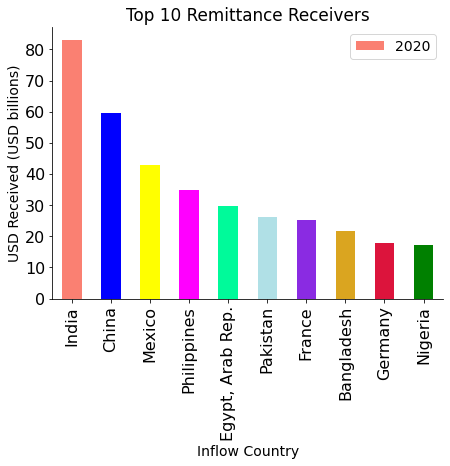

In [25]:
top2020 = in_global.sort_values(2020, ascending=False)


plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
top2020[2020][:10].plot(kind='bar', ylabel='USD Received (USD billions)', title='Top 10 Remittance Receivers', fontsize=16, color=colors)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend()

pd.DataFrame(top2020[2020]).head(15)


/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1223951428.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


,2010
Inflow Country,
India,53479.960083
China,52459.645879
Mexico,22080.259154
Philippines,21556.633836
France,19898.258274
Nigeria,19744.755063
Germany,12788.812790
"Egypt, Arab Rep.",12453.100000
Belgium,10993.669270


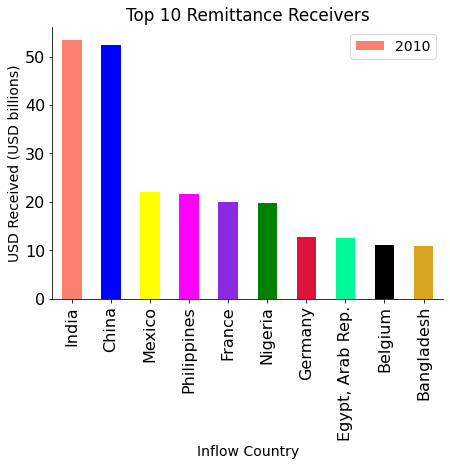

In [26]:
top2010 = in_global.sort_values(2010, ascending=False)


plt.figure(figsize=(7,5))
plt.rc('font', size=14)
colors10 = ['salmon','blue','yellow','magenta','blueviolet','green','crimson','mediumspringgreen','black','goldenrod']

top2010[2010][:10].plot(kind='bar', ylabel='USD Received (USD billions)', title='Top 10 Remittance Receivers', fontsize=16, color=colors10)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend()

pd.DataFrame(top2010[2010]).head(15)

## Total Remittances Received by Continent

In [27]:
cont = in_global.groupby('continentcode').sum('total_rem').sort_values('total_rem', ascending=False)
contt = pd.DataFrame(cont['total_rem'])
contt['Trillions Received (USD)'] = round((contt['total_rem'] / 1000000),3)
contt = contt.drop('total_rem',axis=1)
contt

,Trillions Received (USD)
continentcode,
AS,5.082
EU,3.245
NA,1.374
AF,1.294
SA,0.357
OC,0.119
CB,0.003


/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/4122970546.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])


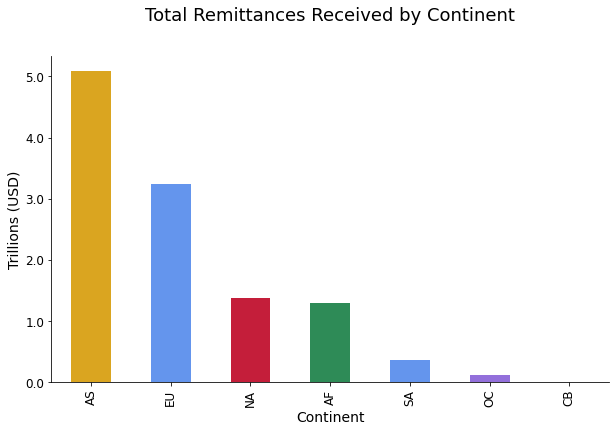

In [28]:
plt.figure()
plt.rc('font', size=14)    

cont.total_rem.plot(kind='bar', xlabel='Continent', ylabel='Trillions (USD)', legend=False, fontsize=12, color=[eucol,ascol,nacol,afcol,ascol,laccol,laccol], figsize=(10,6))
plt.title('Total Remittances Received by Continent', fontsize=18, y=1.09)

plt.ticklabel_format(style='plain', axis='y')
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])
plt.gca().spines[['top','right']].set_visible(False) 
plt.show()

## Total Remittances Received by Region
- Eastern Eu & Central Asia (ECA) | East Asia & Pacific (EAP) | South Asia (SAS) |
- Western Eu (WEU) | Latin Am & Caribbean (LAC) | Middle East & North Af (MENA) | North Am (NA) |
- Eastern & Southern Africa (ESAF) | West & Central Af (WCAF)
#### Source: UNICEF regional classifications (https://data.unicef.org/regionalclassifications/)

In [29]:
regions = in_global.groupby('region').sum('total_rem').sort_values('total_rem', ascending=False)
regionss = pd.DataFrame(regions['total_rem'])
regionss['Trillions Received (USD)'] = round((regionss['total_rem'] / 1000000),3)
regionss = regionss.drop('total_rem',axis=1)
regionss

,Trillions Received (USD)
region,
WEU,2.583
EAP,2.381
SAS,1.989
LAC,1.554
MENA,1.124
EUCA,0.985
WCAF,0.497
ESAF,0.183
NA,0.180


In [30]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14) 

regionss.plot(kind='bar', xlabel='Region', ylabel='Trillions Received (USD)', fontsize=12, color=['b','k','g','m','r','c','y'], legend=False)
plt.title('Total Remittances Received by Region', fontsize=18, y=1.09)
plt.gca().spines[['top', 'right']].set_visible(False)


plt.close()
# the contt & regionss version of data are cleaner but below figures allow easier color customization

<Figure size 504x360 with 0 Axes>

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2445342661.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])


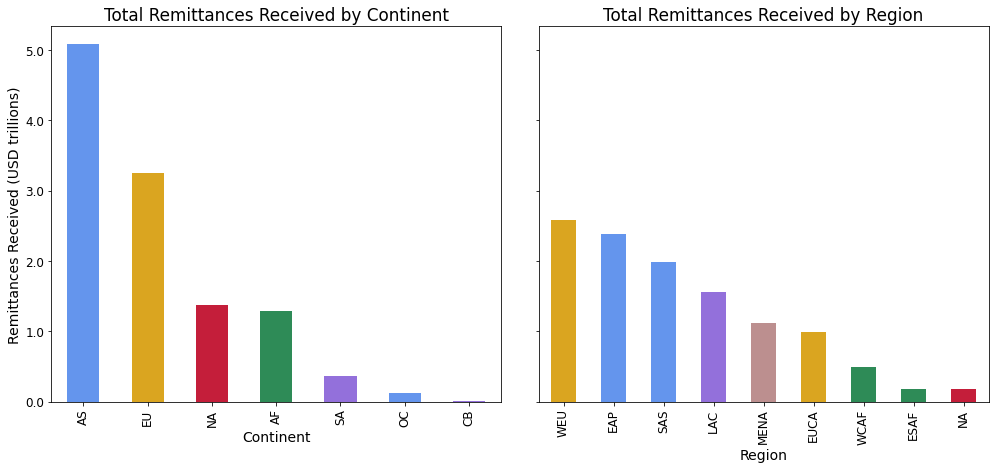

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)
fig.tight_layout()

cont.total_rem.sort_values(ascending=False).plot(kind='bar', ax=axes[0], title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD trillions)', fontsize=12, color=[ascol,eucol,nacol,afcol,laccol,ascol,laccol])
regions.total_rem.sort_values(ascending=False).plot(kind='bar', ax=axes[1], title='Total Remittances Received by Region', xlabel='Region', ylabel='Remittances Received (USD trillions)', fontsize=12, color=[eucol,ascol,ascol,laccol,mencol, eucol,afcol,afcol,nacol])

plt.ticklabel_format(style='plain', axis='y')
plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000000])
plt.show()

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6), sharey=True)
fig.tight_layout()

cont.total_rem.sort_values(ascending=False).plot(kind='bar', ax=axes[0,0], title='Total Remittances Received by Continent', xlabel='Continent', ylabel='Remittances Received (USD billions)', fontsize=12)
contt.plot(kind='bar', xlabel='Continent', ylabel='Trillions (USD)', ax=axes[1,0], legend=False, fontsize=12, color='black')

regions.total_rem.sort_values(ascending=False).plot(kind='bar', ax=axes[0,1], title='Total Remittances Received by Region', xlabel='Region', ylabel='Remittances Received (USD trillions)', fontsize=12, color=['b','k','g','m','r','c','y'])
regionss.plot(kind='bar', xlabel='Region', ylabel='Trillions Received (USD)', ax=axes[1,1], fontsize=12, color=['b','k','g','m','r','c','y'], legend=False)

fig.align_ylabels()

plt.close()
# contt/regionss code is cleaner but cont/regions allowed easier color customization

## Remittances Received over Time

In [33]:
regionss = regions.drop('remit_gdp', axis=1).drop('total_rem', axis=1)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2452573266.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


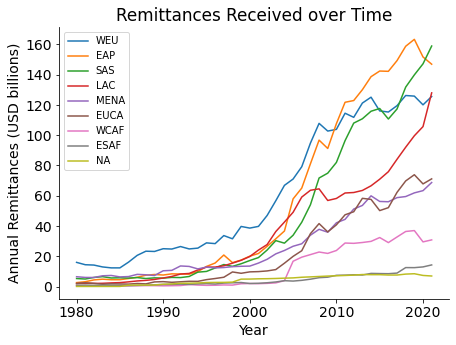

In [34]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(9):
    regionss.iloc[i].plot(title='Remittances Received over Time', xlabel='Year', ylabel='Annual Remittances (USD billions)')

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best',fontsize=10)
plt.show()

### Ukraine probe

In [35]:
inrem0.drop(['remit_gdp', 'total_rem', 'pct_gdp'], axis=1).iloc[200].plot()
inrem0.xs('Ukraine')[2020]
plt.close('all')    # close fig

# Asia Analysis

In [36]:
asia = in_global.loc[in_global.continentcode == 'AS']
asia = asia.sort_values('total_rem', ascending=False)
ascoll = ['#000080','#0F52BA','#1F51FF','#4169E1','#6082B6','#4682B4','#87CEEB','#ADD8E6','#A7C7E7','#CCCCFF']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2054047277.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


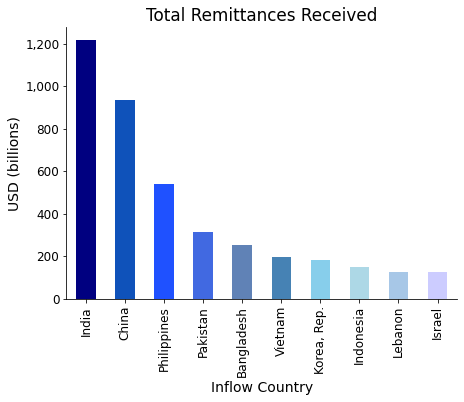

In [37]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
asia.total_rem[:10].plot(kind='bar', color=ascoll, title='Total Remittances Received', ylabel='USD (billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## Trends over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/3015819980.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


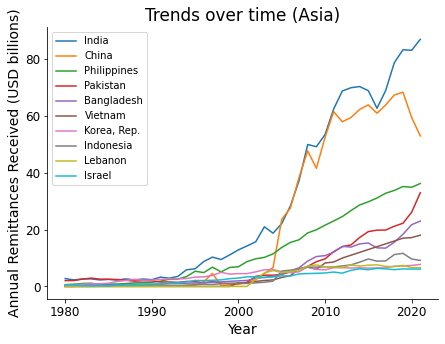

In [38]:
asiaa = asia.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Asia)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    asiaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East Asia & the Pacific Analysis

In [39]:
eap = in_global.loc[in_global.region == 'EAP']
eap = eap.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/3134394110.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


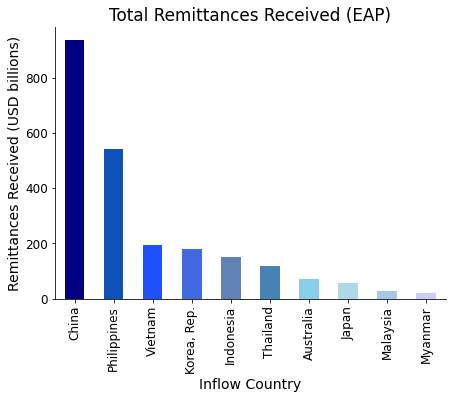

In [40]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14) 
eap.total_rem[:10].plot(kind='bar', title='Total Remittances Received (EAP)', ylabel='Remittances Received (USD billions)', fontsize=12, color=ascoll)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EAP Trends over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/4284130395.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


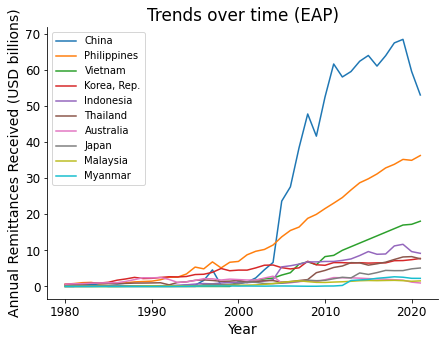

In [41]:
eapp = eap.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EAP)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eapp.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## South Asia Analysis

In [42]:
sas = in_global.loc[in_global.region == 'SAS']
sas = sas.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1969632671.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


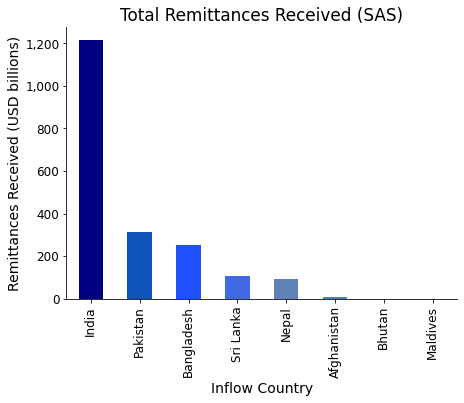

In [43]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14) 
sas.total_rem[:10].plot(kind='bar', title='Total Remittances Received (SAS)', ylabel='Remittances Received (USD billions)', fontsize=12, color=ascoll)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### SAS Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1244387317.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


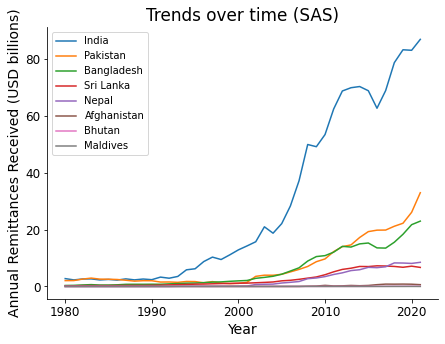

In [44]:
sass = sas.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (SAS)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(len(SAS)):
    sass.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Middle East & North Africa Analysis

In [45]:
mena = in_global.loc[in_global.region == 'MENA']
mena = mena.sort_values('total_rem', ascending=False)
mencoll = ['#770737','#9F2B68','#DE3163','#FF10F0','#DA70D6','#FF69B4','#E37383','#F8C8DC','#F3CFC6','#F2D2BD']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1781216465.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


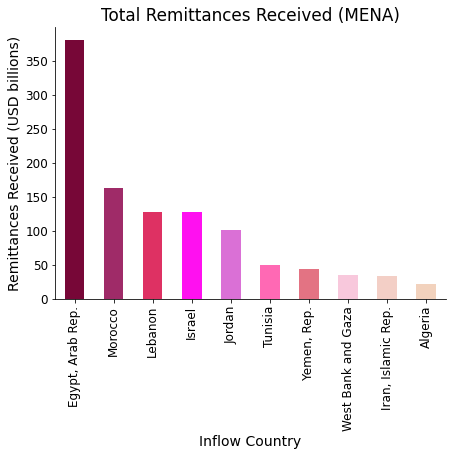

In [46]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
mena.total_rem[:10].plot(kind='bar', title='Total Remittances Received (MENA)', ylabel='Remittances Received (USD billions)', color=mencoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### MENA Trends over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/4280755982.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


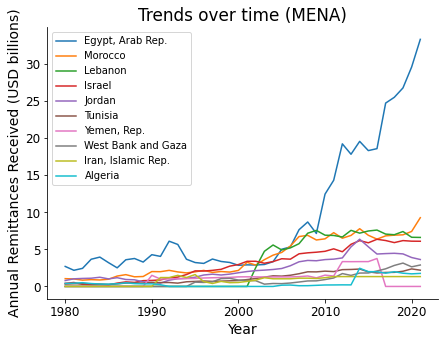

In [47]:
menaa = mena.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (MENA)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    menaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

# Europe Analysis

## Western Europe  Analysis

In [48]:
weu = in_global.loc[in_global.region == 'WEU']
weu = weu.sort_values('total_rem', ascending=False)
eucoll = ['#CD7F32','#CC5500','#F28C28','#E3963E','#FFBF00','#DAA520','#FFC000','#FFEA00','#FAC898','#FFE5B4']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1203878996.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


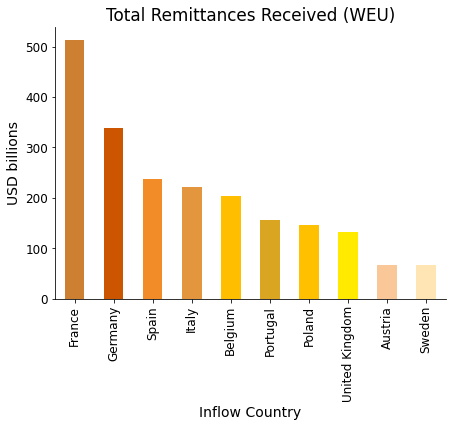

In [49]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
weu.total_rem[:10].plot(kind='bar', title='Total Remittances Received (WEU)', ylabel='USD billions', color=eucoll, fontsize=12)
plt.gca().spines[['top', 'right']].set_visible(False)  

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2950670687.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


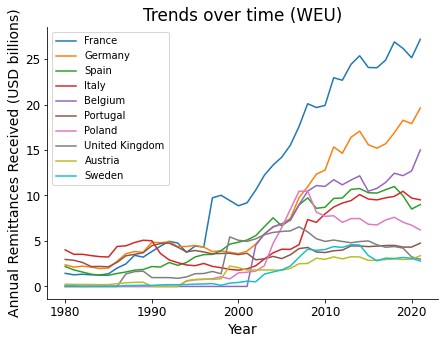

In [50]:
weuu = weu.rename(columns={'2021e':2021}).drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)
# Formatting
plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (WEU)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    weuu.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Eastern Europe & Central Asia Analysis

In [51]:
euca = in_global.loc[in_global.region == 'EUCA']
euca = euca.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/977072418.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


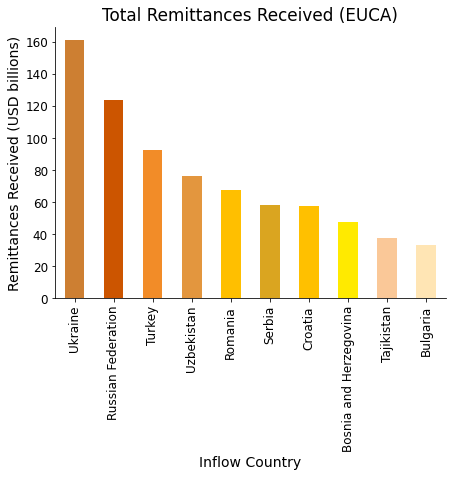

In [52]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
euca.total_rem[:10].plot(kind='bar', title='Total Remittances Received (EUCA)', ylabel='Remittances Received (USD billions)', color=eucoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### EUCA Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/730051698.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


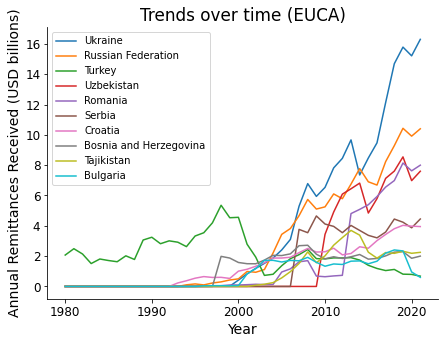

In [53]:
eucaa = euca.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (EUCA)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    eucaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

In [54]:
plt.close('all')
# overlap between senders and receivers
# what are the top migrant groups in SEDING countries

## Latin America & Caribbean

In [55]:
lac = in_global.loc[in_global.region == 'LAC']
lac = lac.sort_values('total_rem', ascending=False)
laccoll = ['#02000A','#120632','#2E165B','#532D84','#7E4EAC','#AF77D5','#CF9FFF','#E0B0FF','#da8ee7','#e8bcf0','#BDB5D5']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2339113439.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


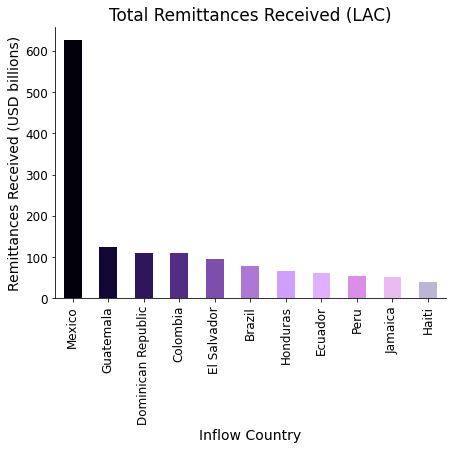

In [56]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
lac.total_rem[:11].plot(kind='bar', color=laccoll, title='Total Remittances Received (LAC)', ylabel='Remittances Received (USD billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### LAC Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1632443053.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


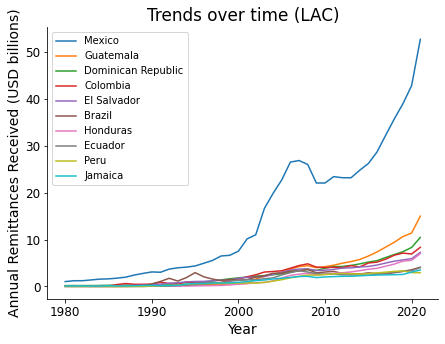

In [57]:
lacc = lac.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (LAC)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    lacc.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## Africa Analysis

In [58]:
africa = in_global.loc[in_global.continentcode == 'AF']
africa = africa.sort_values('total_rem', ascending=False)
afcoll = ['#355E3B','#00A36C','#2AAA8A','#2e8b57','#228b22','#32cd32','#b2ec5d','#c5e384','#AFE1AF','#e9ffdb']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/3966738851.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


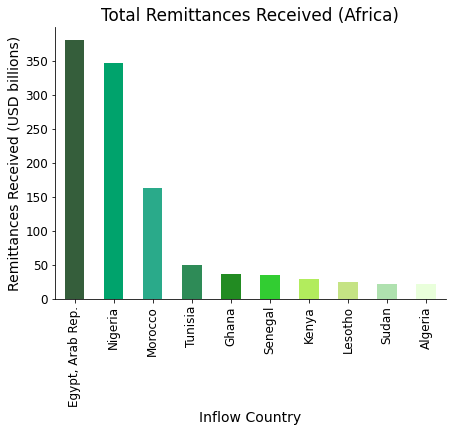

In [59]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)   
africa.total_rem[:10].plot(kind='bar', color=afcoll, title='Total Remittances Received (Africa)', ylabel='Remittances Received (USD billions)', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### Africa Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2584971811.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


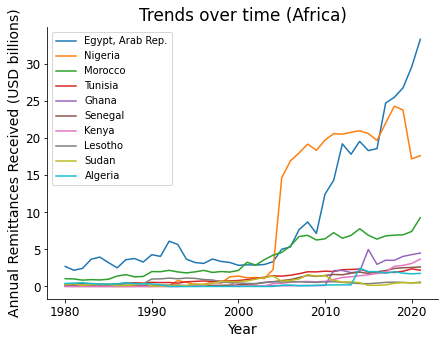

In [60]:
africaa = africa.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (Africa)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    africaa.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## West & Central Africa Analysis

In [61]:
wcaf = in_global.loc[in_global.region == 'WCAF']
wcaf = wcaf.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/127004185.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


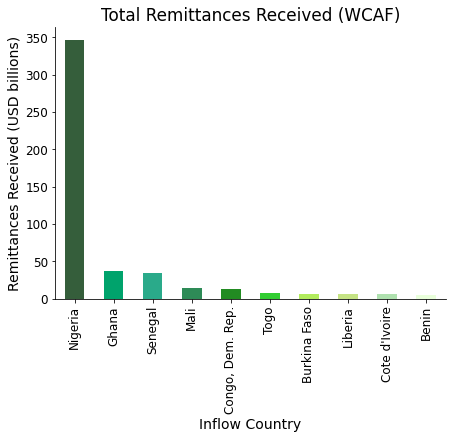

In [62]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)
wcaf.total_rem[:10].plot(kind='bar', title='Total Remittances Received (WCAF)', ylabel='Remittances Received (USD billions)', color=afcoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### WCAF Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/797875498.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


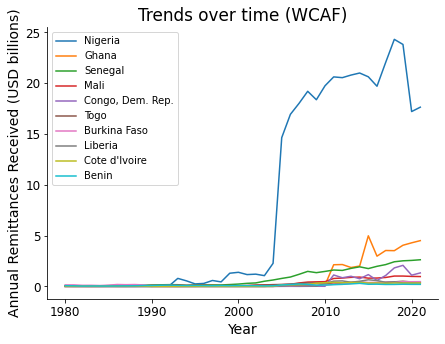

In [63]:
wcaff = wcaf.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (WCAF)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    wcaff.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='best', fontsize=10)
plt.show()

## East & Southern Africa Analysis

In [64]:
esaf = in_global.loc[in_global.region == 'ESAF']
esaf = esaf.sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2233040147.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


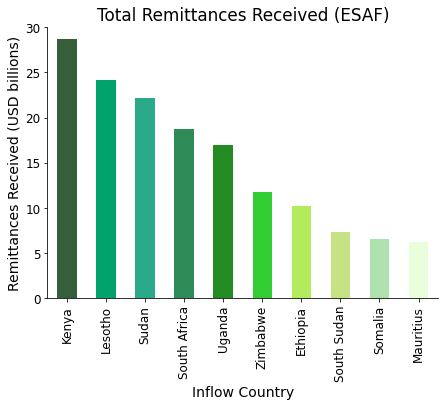

In [65]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)
esaf.total_rem[:10].plot(kind='bar', title='Total Remittances Received (ESAF)', ylabel='Remittances Received (USD billions)', color=afcoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

### ESAF Trends over time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1754149688.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


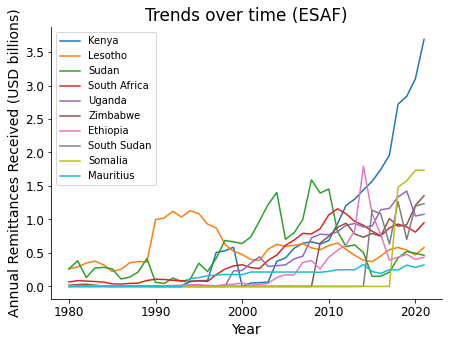

In [66]:
esaff = esaf.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (ESAF)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(10):
    esaff.iloc[i].plot(fontsize=12)

plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='upper left', fontsize=10)
plt.show()

# NA Analysis

In [67]:
naa = in_global.loc[in_global.region == 'NA']
naa = naa.sort_values('total_rem', ascending=False)
nacoll = ['#C41E3A', '#FA5F55']

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/563567195.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


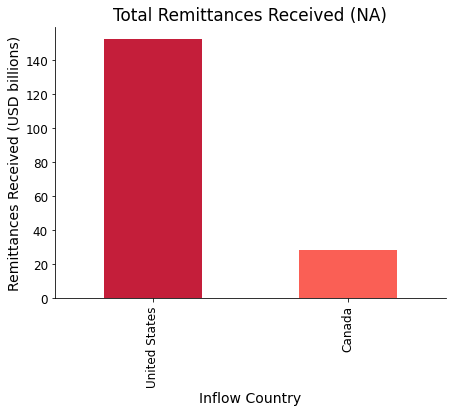

In [68]:
plt.figure(figsize=(7,5))
plt.rc('font', size=14)
naa.total_rem[:10].plot(kind='bar', title='Total Remittances Received (NA)', ylabel='Remittances Received (USD billions)', color=nacoll, fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)  
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## NA Trends over Time

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1753334485.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])


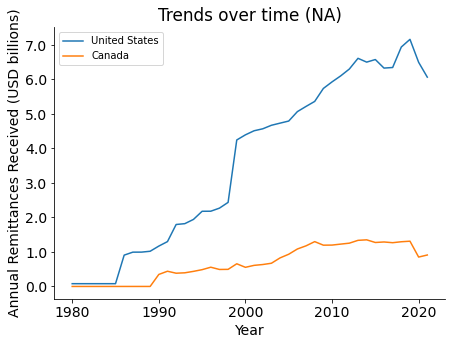

In [69]:
naa = naa.drop(['pct_gdp','remit_gdp','total_rem','continentcode','capital','population_x','currencycode','languages','geonameid','continent','region'], axis=1)

plt.figure(figsize=(7,5))
plt.rc('font', size=14)    
plt.axes(title='Trends over time (NA)', xlabel='Year', ylabel='Annual Remittances Received (USD billions)')
plt.gca().spines[['top', 'right']].set_visible(False)    
plt.ticklabel_format(style='plain', axis='y')

for i in range(len(NA)):
    naa.iloc[i].plot()

plt.gca().set_yticklabels(['{:,.1f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [70]:
plt.close('all')

# GLOBAL WORLDVIEW

In [71]:
import geopandas as gpd
import mapclassify
import plotly.graph_objs as go 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name':'country'})
countries = countries.rename({'name':'country'}, axis=1)
orig_countries = in_global.reset_index().rename({'Inflow Country':'country'}, axis=1)

/Users/Jane/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [72]:
foo = pd.merge(countries, world, on='country', how='right')
# merging countries with world to obtain geometry column from world

In [73]:
# Renaming to make foo country names in merge match original list to maintain necessary geometries
foo.at[4, 'country'] = 'United States'
foo.at[11, 'country'] = 'Congo, Dem. Rep.'
foo.at[17, 'country'] = 'Dominican Republic'
foo.at[18, 'country'] = 'Russian Federation'
foo.at[19, 'country'] = 'Bahamas, The'
foo.at[40, 'country'] = 'Venezuela, RB'
foo.at[60, 'country'] = "Cote d'Ivoire"
foo.at[66, 'country'] = 'Central African Republic'
foo.at[69, 'country'] = 'Equatorial Guinea'
foo.at[73, 'country'] = 'Eswatini'
foo.at[80, 'country'] = 'Gambia, The'
orig_countries.at[88, 'country'] = 'Iran'
orig_countries.at[99, 'country'] = 'South Korea'
orig_countries.at[102, 'country'] = 'Kyrgyzstan'
orig_countries.at[206, 'country'] = 'Yemen'
foo.at[108, 'country'] = 'Syrian Arab Republic'
foo.at[149, 'country'] = 'Brunei Darussalam'
foo.at[152, 'country'] = 'Slovak Republic'
foo.at[153, 'country'] = 'Czech Republic'
foo.at[163, 'country'] = 'Egypt, Arab Rep.'
foo.at[167, 'country'] = 'Somalia'
foo.at[170, 'country'] = 'Bosnia and Herzegovina'
foo.at[171, 'country'] = 'North Macedonia'
foo.at[176, 'country'] = 'South Sudan'
foo.at[160, 'country'] = 'Cyprus'

In [74]:
new_world = pd.merge(foo, orig_countries, on='country', how='left')
new_world = gpd.GeoDataFrame(new_world, geometry='geometry')    # convert pandas df to geodataframe for plotting

In [75]:
new_world[new_world.geometry.isna()]    # all items now have geometries
new_world[new_world.total_rem < 1]

,geonameid_x,country,iso,iso3,isonumeric,fips,continentcode_x,capital_x,areakm2,population,...,remit_gdp,total_rem,continentcode_y,capital_y,population_x,currencycode_y,languages_y,geonameid_y,region,continent_y
19,3572887,"Bahamas, The",BS,BHS,44,BF,NA,Nassau,13940,301790,...,0.0,0.000000,CB,NaN,NaN,NaN,NaN,NaN,LAC,Caribbean
47,3562981,Cuba,CU,CUB,192,CU,NA,Havana,110860,11423000,...,0.0,0.000000,NA,Havana,11423000,CUP,es-CU,3562981,LAC,North America
66,NaN,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.509873,AF,Bangui,4844927,XAF,"fr-CF,sg,ln,kg",239880,WCAF,Africa
84,290557,United Arab Emirates,AE,ARE,784,AE,AS,Abu Dhabi,82880,4975593,...,NaN,0.000000,AS,Abu Dhabi,4975593,AED,"ar-AE,fa,en,hi,ur",290557,MENA,Asia
149,1820814,Brunei Darussalam,BN,BRN,96,BX,AS,Bandar Seri Begawan,5770,395027,...,NaN,0.000000,AS,NaN,NaN,NaN,NaN,NaN,EAP,Asia


# Global Worldview

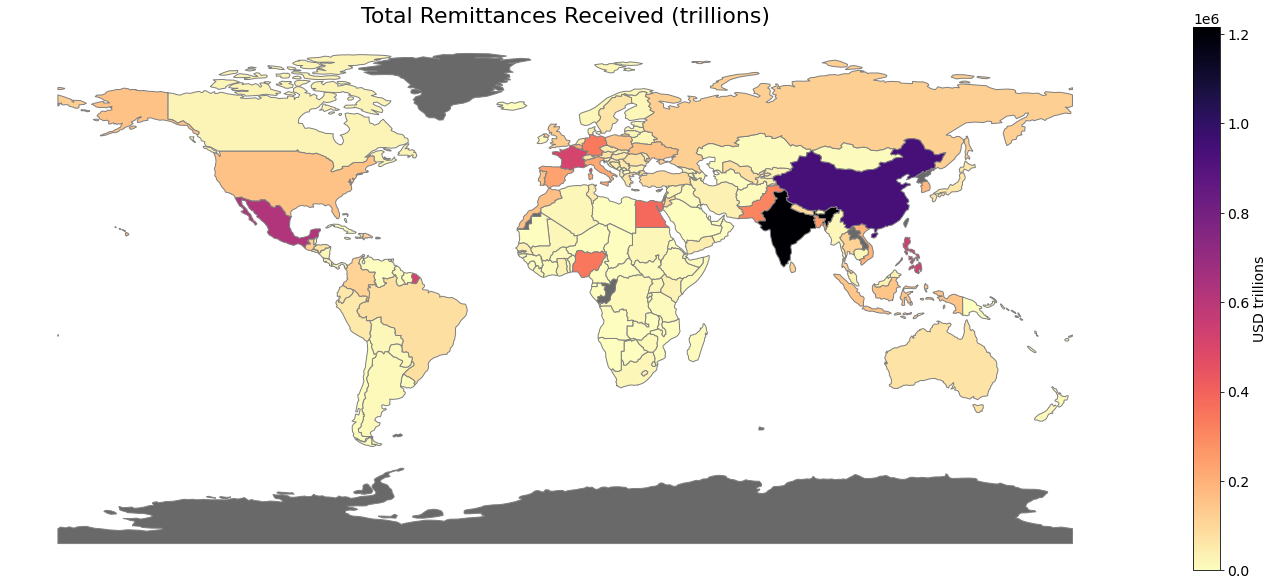

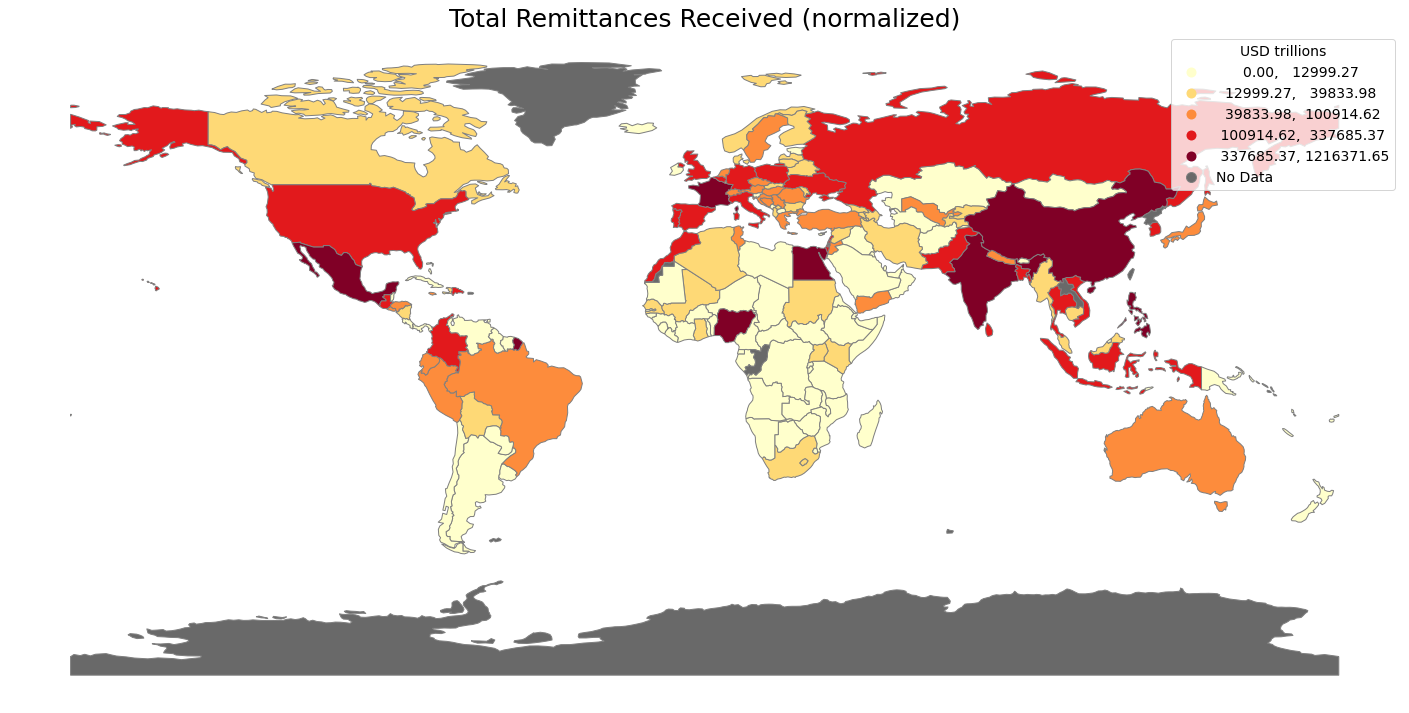

In [76]:
new_world.plot(column='total_rem', cmap='magma_r', figsize=(25,25), 
               legend=True, legend_kwds={'label': 'USD trillions', 'shrink': 0.4},
               edgecolor='grey', missing_kwds={'label': 'No Data', 'color':'dimgrey'})
# not optimized bc Jenks optimization creates bins that hide the slight variation between countries (ie. ~all Africa+LAC same color)
plt.title('Total Remittances Received (trillions)', fontsize=22)
plt.axis('off')

new_world.plot(column='total_rem', cmap='YlOrRd', scheme='jenkscaspall', 
               legend=True, legend_kwds={'title': 'USD trillions'},
               figsize=(25,25), edgecolor='grey', missing_kwds={'label': 'No Data', 'color':'dimgrey'})
plt.title('Total Remittances Received (normalized)', fontsize=25)
plt.axis('off')
plt.show()

The Jenks optimization method (natural breaks classification) is a data clustering method designed to determine the best arrangement of values into different classes. This is done by seeking to minimize each class's average deviation from the class mean, while maximizing each class's deviation from the means of the other classes (ie. the method reduces variance within classes and maximizes the variance between classes)

## NA close-up

In [77]:
na = new_world[new_world["region"] == "NA"]
na = gpd.GeoDataFrame(na, geometry='geometry')
na = na.set_index('country').sort_values('total_rem', ascending=False)
na['billions'] = na.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1763784384.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


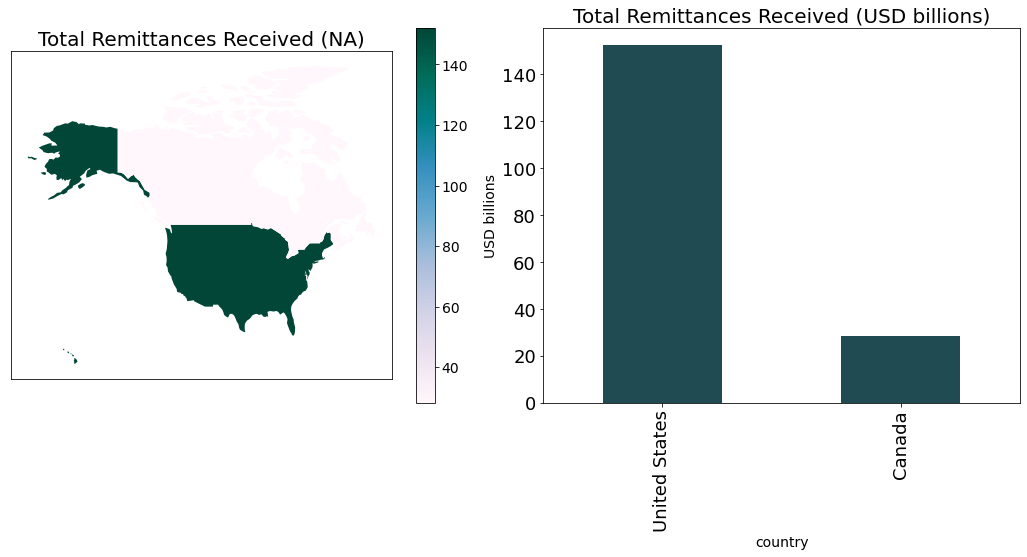

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.tight_layout()


na.plot(column='billions', cmap='PuBuGn', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (NA)', fontsize=20)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

na.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='#204B53', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## LAC close-up

In [79]:
lacc = new_world[new_world["region"] == "LAC"]
lacc = gpd.GeoDataFrame(lacc, geometry='geometry')
lacc['billions'] = lacc.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1664422355.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


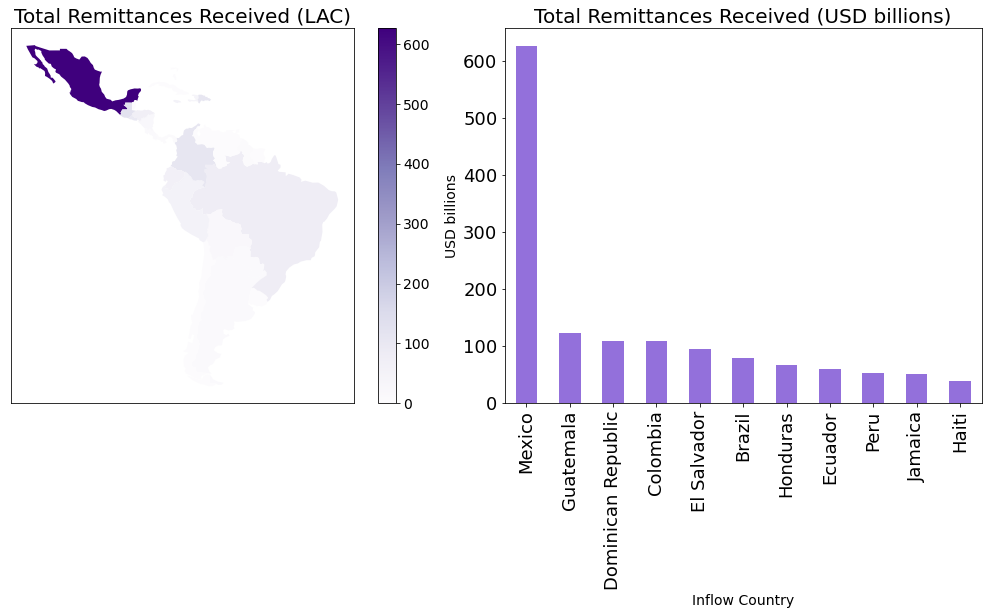

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.tight_layout()


lacc.plot(column='billions', cmap='Purples', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (LAC)', fontsize=20)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

lac.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='mediumpurple', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## WEU close-up

In [81]:
weu = new_world[new_world["region"] == "WEU"]
weu = gpd.GeoDataFrame(weu, geometry='geometry')
weu['billions'] = weu.total_rem/1000
weu = weu.set_index('country').sort_values('total_rem', ascending=False)

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/918542011.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


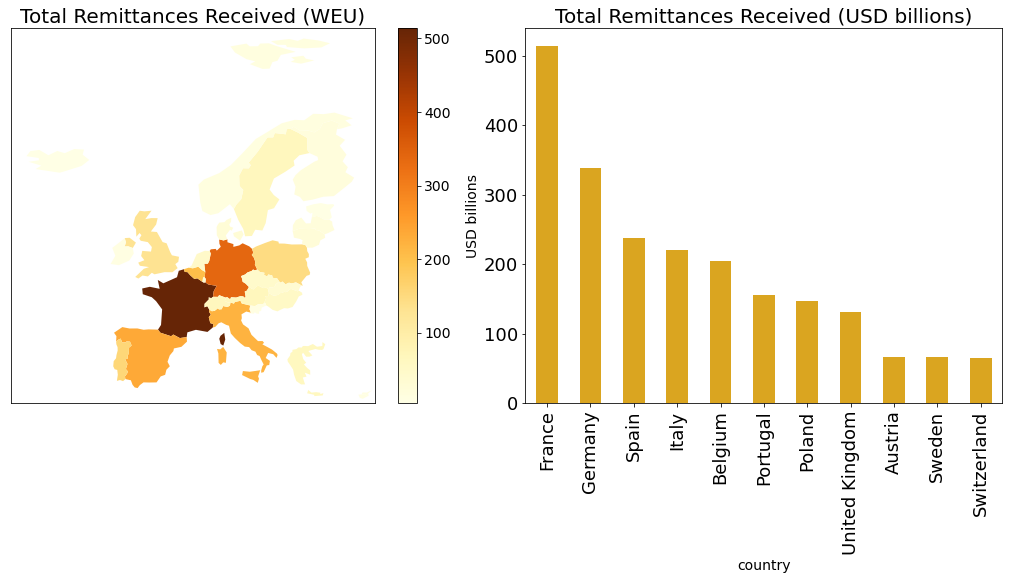

In [82]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
fig.tight_layout()

weu.plot(column='billions', cmap='YlOrBr', legend=True, ax=axes[0], figsize=(10,5))
axes[0].set_title('Total Remittances Received (WEU)', fontsize=20)
axes[0].set_xlim(-27, 35)
axes[0].set_ylim(34, 82)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

weu.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='goldenrod', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## EUCA close-up

In [83]:
euca = new_world[new_world["region"] == "EUCA"]
euca = gpd.GeoDataFrame(euca, geometry='geometry')
euca = euca.set_index('country').sort_values('total_rem', ascending=False)
euca['billions'] = euca.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/219950185.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


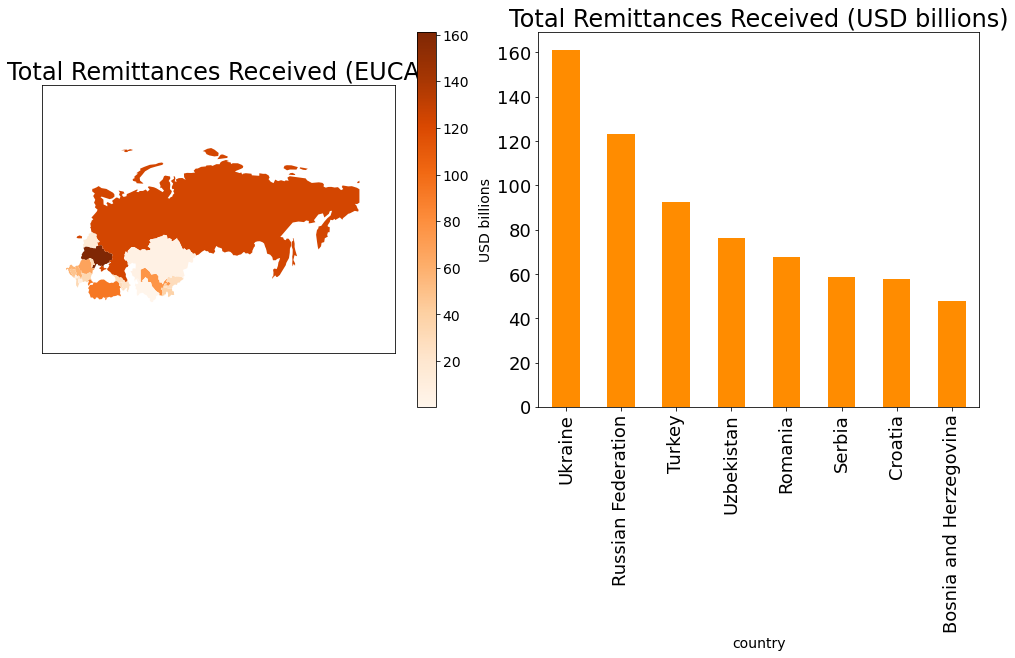

In [84]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout()

euca.plot(column='billions', cmap='Oranges', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (EUCA)', fontsize=24)
axes[0].set_xlim(0, 200)
axes[0].set_ylim(20, 100)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

euca.total_rem[:8].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='darkorange', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=24)   
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## MENA close-up

In [85]:
mena = new_world[new_world["region"] == "MENA"]
mena = gpd.GeoDataFrame(mena, geometry='geometry')
mena = mena.set_index('country').sort_values('total_rem', ascending=False)
mena['billions'] = mena.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1423569622.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


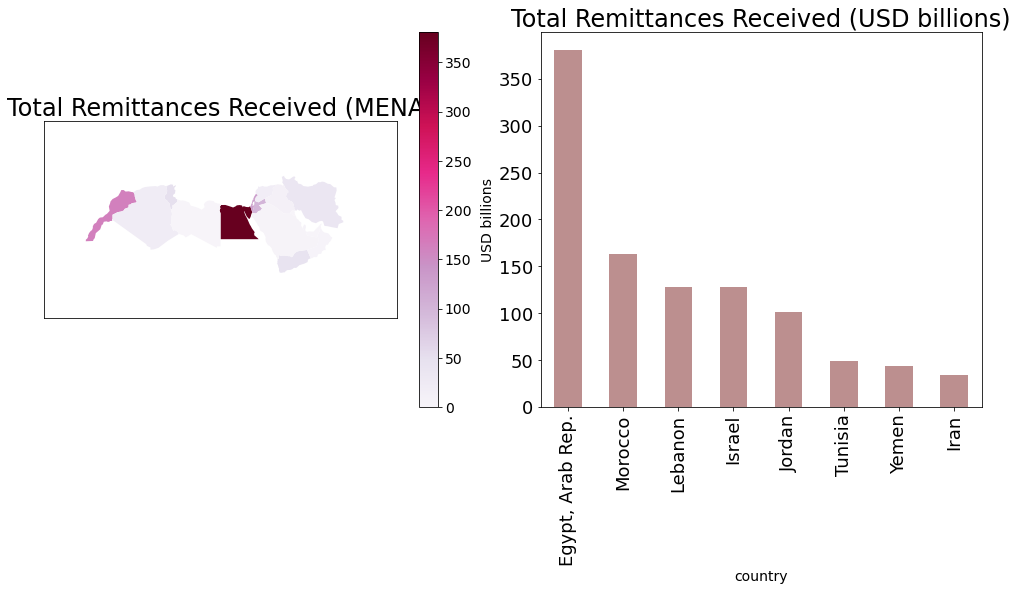

In [86]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout()

mena.plot(column='billions', cmap='PuRd', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (MENA)', fontsize=24)
axes[0].set_xlim(-30, 80)
axes[0].set_ylim(0, 55)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

mena.total_rem[:8].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='rosybrown', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=24)   
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## WCAF close-up

In [87]:
wcaf = new_world[new_world["region"] == "WCAF"]
wcaf = gpd.GeoDataFrame(wcaf, geometry='geometry')
wcaf = wcaf.set_index('country').sort_values('total_rem', ascending=False)
wcaf['billions'] = wcaf.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/2658026874.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


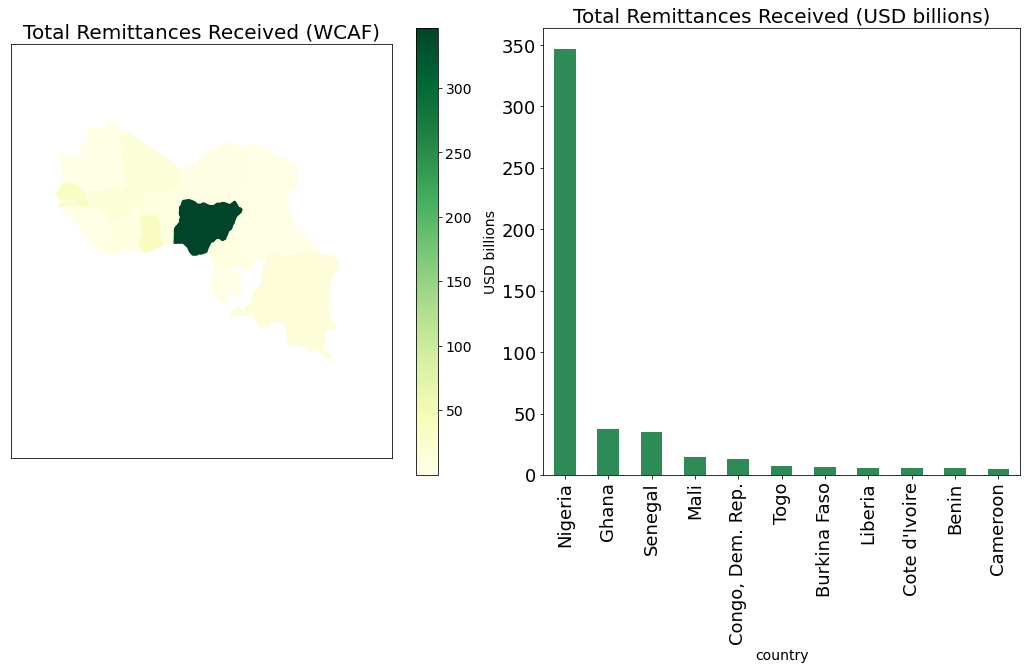

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
fig.tight_layout()

wcaf.plot(column='billions', cmap='YlGn', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (WCAF)', fontsize=20)
axes[0].set_xlim(-25,40)
axes[0].set_ylim(-30, 40)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

wcaf.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='seagreen', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## ESAF close-up

In [89]:
esaf = new_world[new_world["region"] == "ESAF"]
esaf = gpd.GeoDataFrame(esaf, geometry='geometry')
esaf = esaf.set_index('country').sort_values('total_rem', ascending=False)
esaf['billions'] = esaf.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1526238383.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


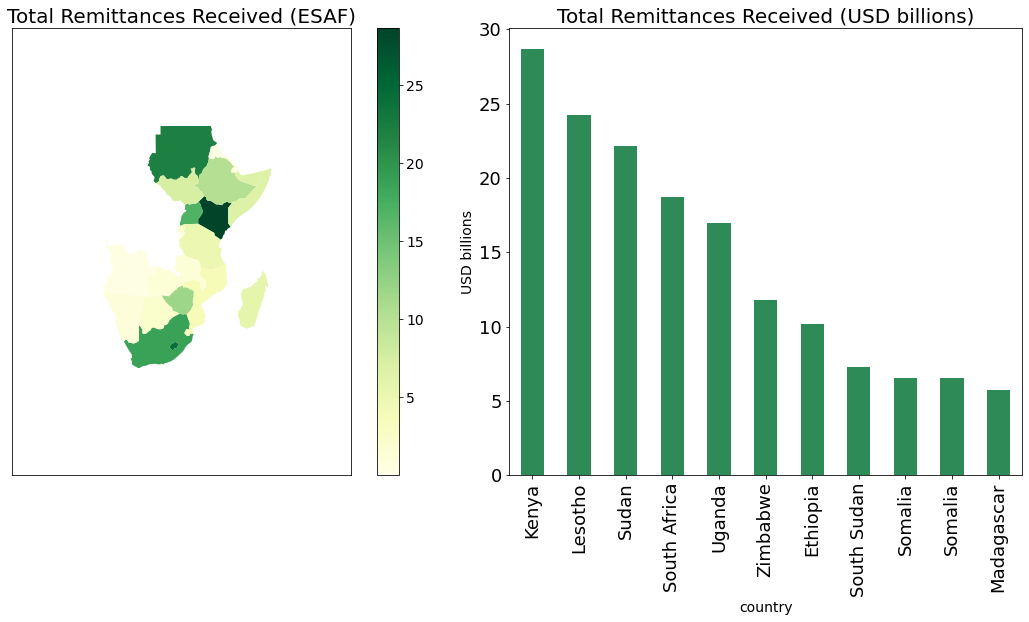

In [90]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.tight_layout()

esaf.plot(column='billions', cmap='YlGn', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (ESAF)', fontsize=20)
axes[0].set_xlim(-10,70)
axes[0].set_ylim(-60, 45)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

esaf.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='seagreen', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## EAP close-up

In [91]:
eap = new_world[new_world["region"] == "EAP"]
eap = gpd.GeoDataFrame(eap, geometry='geometry')
eap = eap.set_index('country').sort_values('total_rem', ascending=False)
eap['billions'] = eap.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/3844058500.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


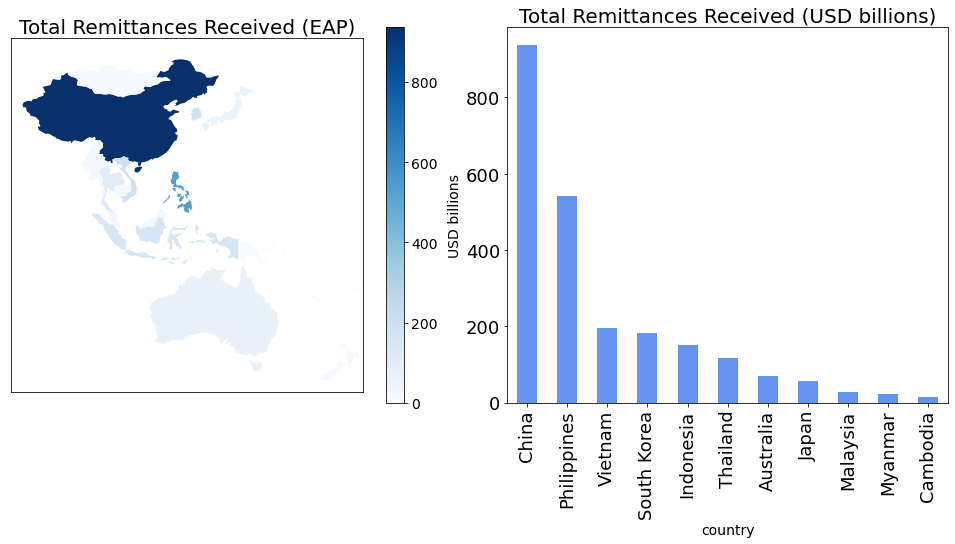

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout()

eap.plot(column='billions', cmap='Blues', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (EAP)', fontsize=20)
axes[0].set_xlim(70,180)
axes[0].set_ylim(-50, 60)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

eap.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='cornflowerblue', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

## SAS close-up

In [93]:
sas = new_world[new_world["region"] == "SAS"]
sas = gpd.GeoDataFrame(sas, geometry='geometry')
sas = sas.set_index('country').sort_values('total_rem', ascending=False)
sas['billions'] = sas.total_rem/1000

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/561525936.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])


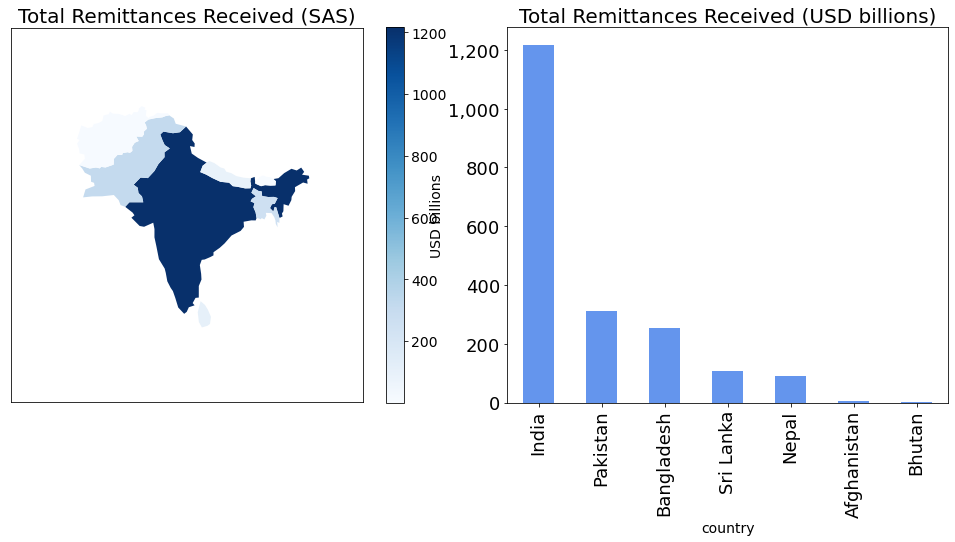

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.tight_layout()

sas.plot(column='billions', cmap='Blues', legend=True, ax=axes[0])
axes[0].set_title('Total Remittances Received (SAS)', fontsize=20)
axes[0].set_xlim(50,106)
axes[0].set_ylim(-5, 50)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)

sas.total_rem[:11].plot(kind='bar', ax=axes[1], ylabel='USD billions', color='cornflowerblue', fontsize=18)
plt.title('Total Remittances Received (USD billions)', fontsize=20)
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in (plt.gca().get_yticks())/1000])
plt.show()

In [95]:
# Bubble map w/ remit. as proportional bubble sizes
centroids = new_world.copy()
centroids.geometry = new_world.centroid

ax = new_world.plot(facecolor='w', edgecolor='k', figsize=(20,20))
centroids.plot(markersize=new_world['total_rem']/200, ax=ax)
# centroid size reflects magnitude of remit received
plt.close('all')

/var/folders/s4/dp397f9j3zs5ymr83ltkv2m80000gn/T/ipykernel_89780/1248198644.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = new_world.centroid
